
## Case Study: A better Smoker Detector

**Objective:**

In this notebook, you will work on the insurance csv file. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Read & visualize data
Let's load the **insurance.csv** dataset to our code, using **pandas** module, more specifically, the **read_csv** function.

In [317]:
# read CSV file in Pandas
data = pd.read_csv('/content/insurance.csv')

# display first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Question 1:** how many rows & columns in our dataset

In [318]:
# get the number of rows and columns
rows = len(data) # Or we can use data.shape[0] for rows and data.shape[1] for columns
columns = len(data.columns)

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [320]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

**Question 2:** Select the instances where the data.smoker == "yes" and the ones where the data.smoker == "no". Save them in smokers and non_smokers dataframes respectively. Then count how many you have in each category.

In [321]:
# select smokers
smokers = data[data.smoker == "yes"]

# select non smokers
non_smokers = data[data.smoker == "no"]

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0])) # 0 for rows


There are 274 smokers and 1064 non-smokers.


**Question 3:** Is your data balanced?


No, because we have more than 274 non-smokers  so it's imbalanced data (the ratio of non smokers are higher than the smokers)

###Exploratory Data Analysis

Let's start by seeing how much each feature tells us about a person being  a smoker or not.

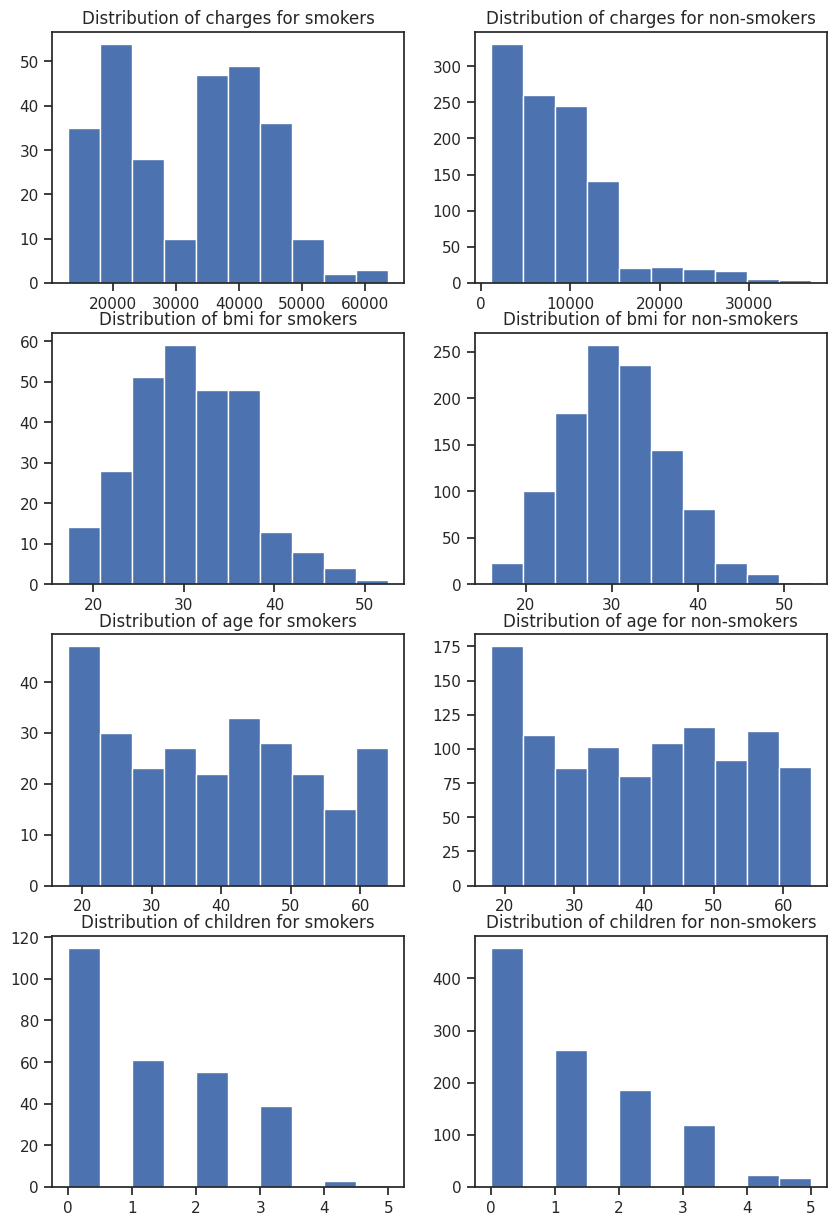

In [322]:
numerical_features = ['charges', 'bmi', 'age', 'children']

subplot_number = 421
fig = plt.figure(figsize=(10,15))

for f in numerical_features:

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(smokers[f])
  ax.set_title('Distribution of ' + f + ' for smokers')

  ax = fig.add_subplot(subplot_number)
  subplot_number += 1
  ax.hist(non_smokers[f])
  ax.set_title('Distribution of '+ f + ' for non-smokers')

**Question 4:** From the above histograms, deduce which feature tells us the most about a person being smoker or not?

Charges since smokers and non-smokers are shown to be distributed differently, and there is no big difference between smokers and non-smokers' distribution in other features.

Now let's see if the gender influences being a smoker or not.

smoker   no  yes
sex             
female  547  115
male    517  159


<Axes: xlabel='sex'>

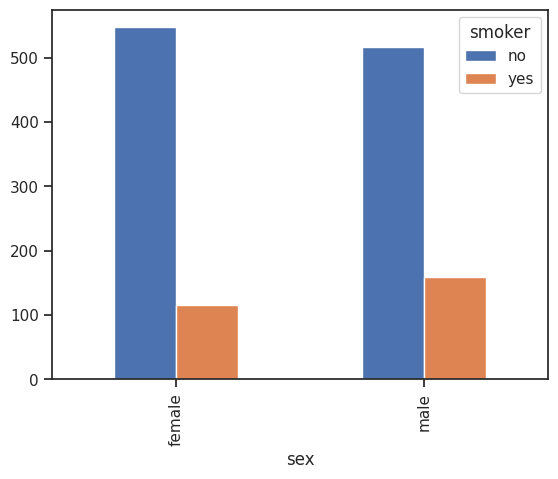

In [323]:
Gender = pd.crosstab(data['sex'],data['smoker'])
print(Gender)
Gender.plot(kind='bar')

**Question 5:** What can you conclude about the gender and the smoker status?

The ratio of smokers and non-smokers is alike for both genders, so gender does not affect whether a person smokes or not.

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by removing missing data.

**Question 6:** How many missing value are there in each column?

In [324]:
# print how many missing value in each column
data.isnull().sum()


age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Let's drop rows with missing values

In [325]:
# drop rows with missing values
data = data.dropna()

# Check for missing values again
print("Missing values:\n", data.isnull().sum())

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



**Question 7:**


*   Replace male and female with 0 and 1
*   Replace smoker and non smoker represented by yes and no in the dataframe with 0 and 1



In [326]:
# define dictionary
sex = {'female':1, 'male':0}
# replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: sex[x])
# print head to verify
data.head()

<ipython-input-326-e2f38d0ebd7d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


And now the smokers column

In [327]:
# define dictionary
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
# print head to verify
data.head()

<ipython-input-327-52783add5a1b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


And now the Region Column

In [328]:
# define dictionary
regions = {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}
# replace region column with the corresponding values
data['region'] = data['region'].apply(lambda x: regions[x])
# print head to verify
data.head()

<ipython-input-328-236b07d60765>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


#### Normalization

**Question 8:** Let's scale all the columns by dividing by the maximum

In [329]:
# get the max of each column
max_values = data.max()
max_values

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
region          3.00000
charges     63770.42801
dtype: float64

In [330]:
# divide each column by its maximum value
data = data / max_values


### Data visualization

#### correlation matrix

#### Is there a Relationship between BMI and Age?

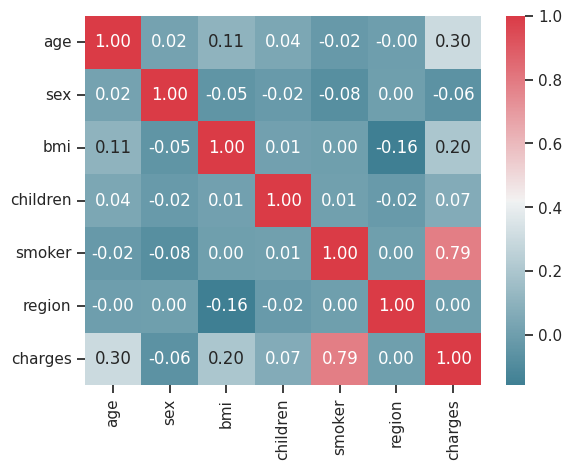

In [331]:
import seaborn as sns

# Calculate the correlation matrix
corr = data.corr()

# Generate a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 10, as_cmap=True))

# Display the heatmap
plt.show()


#### Boxplot

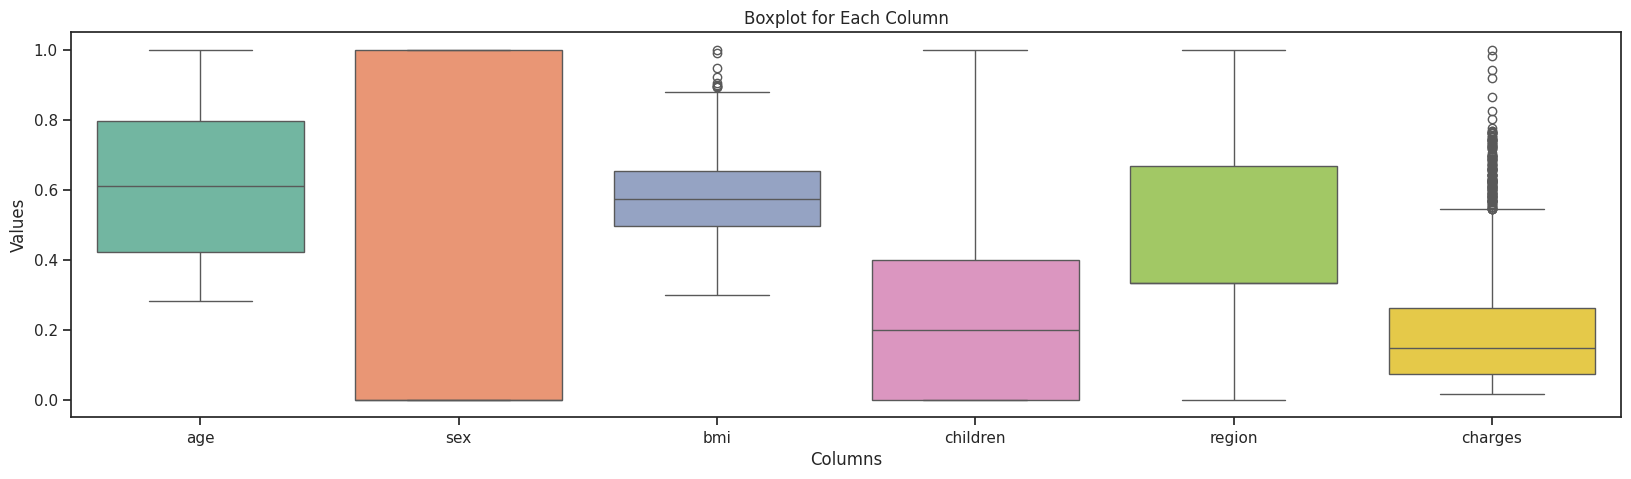

In [332]:
#Set the matplotlib
plt.figure(figsize=(20, 5))

# Create a new DataFrame (df_bx) with the same data as the original DataFrame (df)
df_bx = data.copy()

#Create boxplots for each column using seaborn
sns.boxplot(data=df_bx.drop('smoker', axis=1), orient='v', palette='Set2')
#Labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot for Each Column')
plt.show()

#### Scatterplot

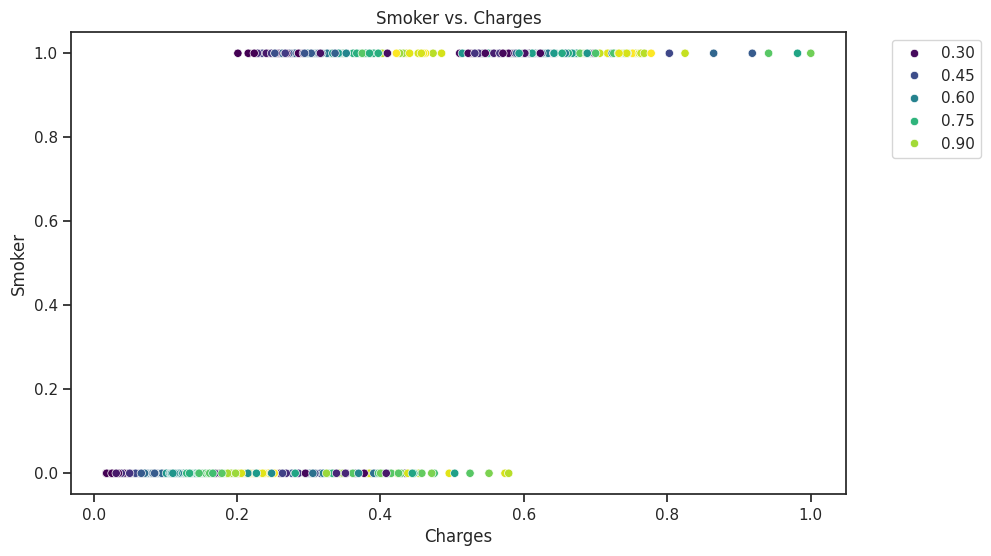

In [333]:
# Create a scatter plot
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='charges', y='smoker', data=data, hue='age', palette='viridis')
plt.title('Smoker vs. Charges')
plt.xlabel('Charges')
plt.ylabel('Smoker')

# Adjust the legend position and size
scatter_plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Histogram

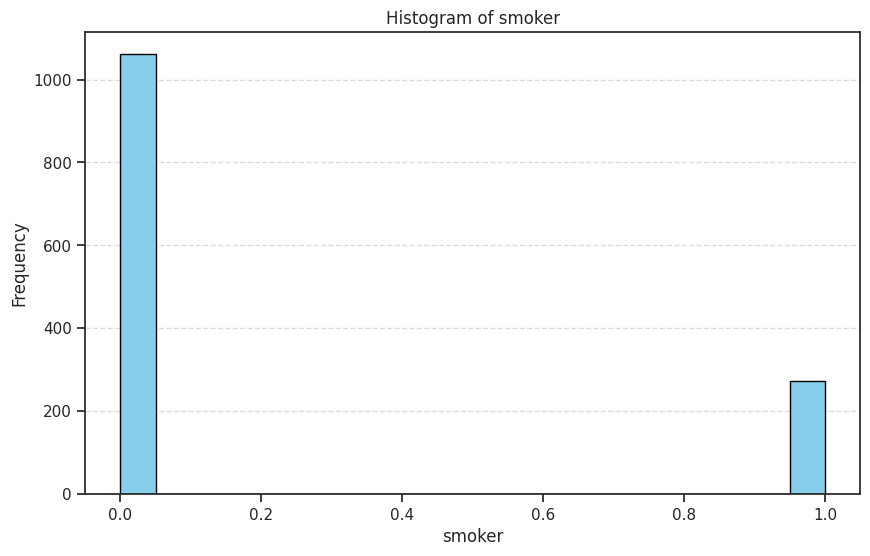

In [334]:
# Select the column to create a histogram
column_to_plot = 'smoker'

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data[column_to_plot], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   float64
 1   sex       1335 non-null   float64
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   float64
 4   smoker    1335 non-null   float64
 5   region    1335 non-null   float64
 6   charges   1335 non-null   float64
dtypes: float64(7)
memory usage: 83.4 KB


#### Distribution of Smokers and Non-Smokers by Age Group

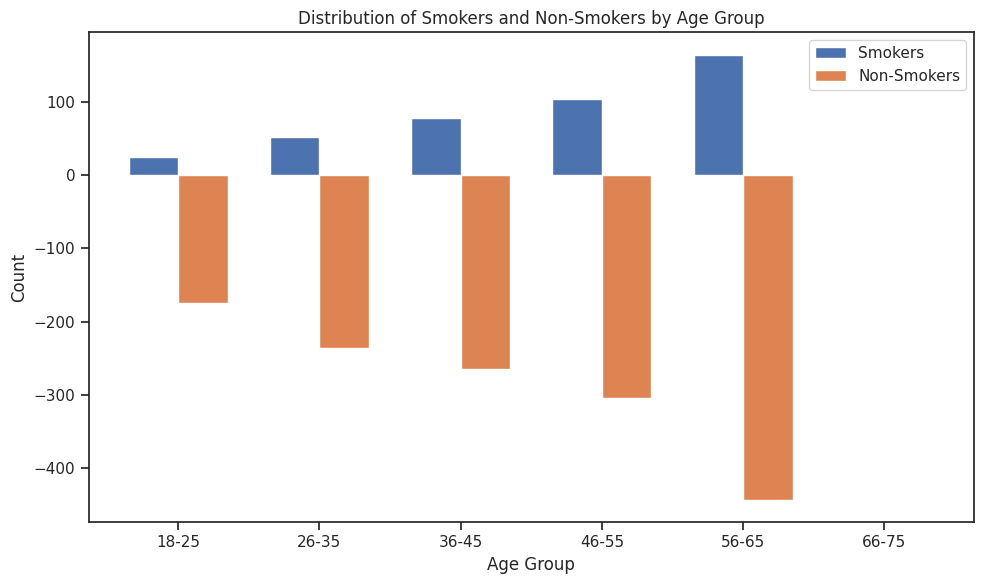

In [336]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data generation
np.random.seed(0)
ages = np.random.randint(18, 70, 1000)
smoker_probabilities = np.clip((ages / 100) + np.random.normal(0, 0.2, 1000), 0, 1)
smoker_status = np.random.binomial(1, smoker_probabilities)

# Creating age groups
age_groups = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
age_bins = [18, 25, 35, 45, 55, 65, 75]

# Assigning age groups
age_labels = np.digitize(ages, age_bins)
age_labels = np.where(age_labels > 5, 5, age_labels)
age_labels -= 1

# Counting smokers and non-smokers in each age group
smokers_by_age_group = [np.sum(smoker_status[age_labels == i]) for i in range(len(age_groups))]
non_smokers_by_age_group = [np.sum(~smoker_status[age_labels == i]) for i in range(len(age_groups))]

# Plotting
bar_width = 0.35
index = np.arange(len(age_groups))

plt.figure(figsize=(10, 6))
plt.bar(index, smokers_by_age_group, bar_width, label='Smokers')
plt.bar(index + bar_width, non_smokers_by_age_group, bar_width, label='Non-Smokers')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers by Age Group')
plt.xticks(index + bar_width / 2, age_groups)
plt.legend()

plt.tight_layout()
plt.show()


#### Distribution of Smokers and Non-Smokers

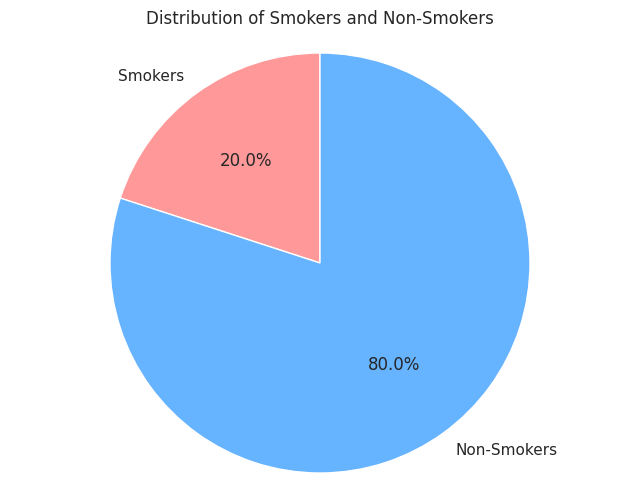

In [337]:
import matplotlib.pyplot as plt

# Sample data generation
total_individuals = 1000
smoker_prob = 0.2  # Assuming 20% of individuals are smokers
num_smokers = int(total_individuals * smoker_prob)
num_non_smokers = total_individuals - num_smokers

# Creating labels and sizes for the pie chart
labels = ['Smokers', 'Non-Smokers']
sizes = [num_smokers, num_non_smokers]
colors = ['#ff9999', '#66b3ff']  # Smokers: Red, Non-Smokers: Blue

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Smokers and Non-Smokers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## 4. Model Training & Testing



#### Data splits

**Question 9:** Before training, we need to split data into training (80%) & testing (20%)

In [338]:
features = ['age',	'sex',	'bmi',	'children', 'region',	'charges']

X = data[features]
y = data['smoker']

# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


#### Logistic Regression Modeling


In [339]:
# define our regression model
model = LogisticRegression()
# train our model
model.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

In [340]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_model_1 = accuracy_score(y_pred, y_test)
precision_model1 = precision_score(y_test, y_pred)
recall_model1 = recall_score(y_test, y_pred)
f1_score_model1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model_1,
      "\nPrecision:",precision_model1,
      "\nRecall:", recall_model1,
      "\nF1 Score:", f1_score_model1)

Accuracy: 0.898876404494382 
Precision: 0.9523809523809523 
Recall: 0.6153846153846154 
F1 Score: 0.7476635514018692


We can see that the recall, and the f1 score can be improved.

**Question 10:** What can you do to improve results?

By collecting more data,reshuffle by under or over sampling, and fine-tuning model hyperparameters

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

<Axes: >

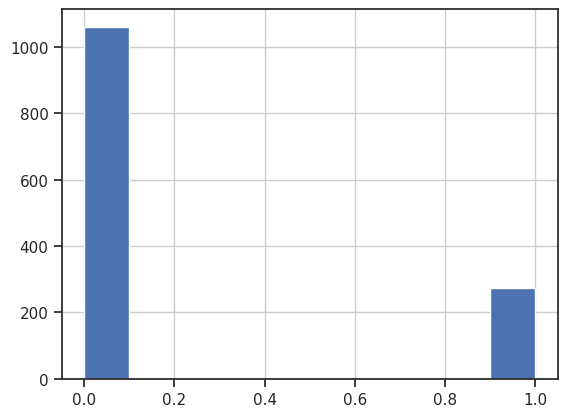

In [341]:
data['smoker'].hist()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [342]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy= 0.5)
x_new, y_new = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy= 1)
x_new, y_new = under.fit_resample(x_new, y_new)

(array([530.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 530.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

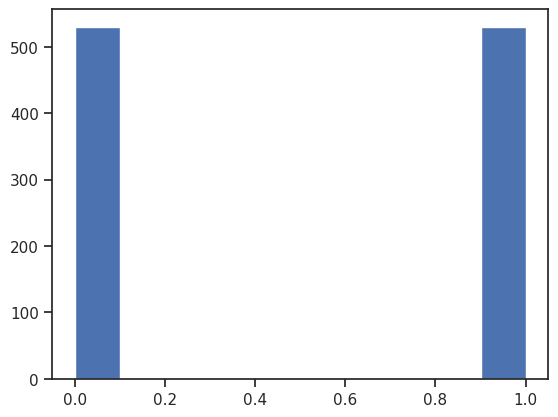

In [343]:
plt.hist(y_new)

In [344]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [345]:
y_pred = model.predict(x_test)

accuracy_model2 = accuracy_score(y_test, y_pred)
precision_model2 = precision_score(y_test, y_pred)
recall_model2 = recall_score(y_test, y_pred)
f1_score_model2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_model2,
      "\nPrecision:",precision_model2,
      "\nRecall:", recall_model2,
      "\nF1 Score:", f1_score_model2)

Accuracy: 0.9575471698113207 
Precision: 0.9166666666666666 
Recall: 1.0 
F1 Score: 0.9565217391304348


We can see how much our scores got better when we balanced our dataset.

# Thank you miss Ola for all of your efforts <3